# Decision Tree Model to predict student's STAAR scores.

> In this notebook, I will create a Decision Tree model using the 2021-2022 Webb's student data to predict the Math STAAR scores for the 2022-2023 school year. Student's IDs, Names and Last Names were changed to "dummy" ones to comply with FERPA law.

## Case 1: Sca Avg and Absences of SM1 in STAAR Classification

### i. Import Data

In [51]:
# Import files
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

# Notebook folder path
path = os.getcwd()
parent = os.path.join (path, os.pardir)
nb_path = (os.path.abspath(parent))

# Load dataset
df = pd.read_csv(nb_path + "/data/dummy_8th_2122_webb_sca_staar.csv")

In [52]:
# Add an average columns for sca's and rename df to df01 which includes less columns

df_v1 = df.assign(sca_avg = df[["sca_1","sca_2","sca_3"]].mean(axis=1) )
df_v1 = df_v1[["student_id", "first_name", "last_name", "sca_1","sca_2","sca_3", "staar_curr", "staar_curr_clas" , "sca_avg"]]
df_v1.head()

,student_id,first_name,last_name,sca_1,sca_2,sca_3,staar_curr,staar_curr_clas,sca_avg
0,1,Michael,Tahleel Ahmed,41.7,61.1,NaN,1433.0,Did Not Meet Grade Level,51.400000
1,2,Christopher,Nicholas Anderton,50.0,44.4,NaN,1578.0,Did Not Meet Grade Level,47.200000
2,3,Jessica,Janis Ashton,50.0,50.0,NaN,1578.0,Did Not Meet Grade Level,50.000000
3,4,Matthew,Paola Bacigalupo,58.0,44.0,50.0,1513.0,Did Not Meet Grade Level,50.666667
4,5,Ashley,Adrian Barlow,33.0,39.0,71.0,1540.0,Did Not Meet Grade Level,47.666667


C:\Users\Checo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='sca_avg', ylabel='staar_curr'>

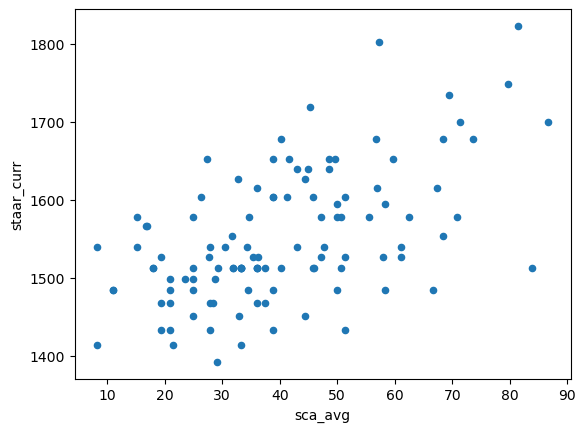

In [53]:
# Graph STAAR score vs SCA Avg Score
df_v1.plot(kind = 'scatter', x = 'sca_avg', y = 'staar_curr')

### ii. Identifying missing values and data type formatting
Check type of data in each column

In [3]:
# Data type of each column
df_v1.dtypes

student_id           int64
first_name          object
last_name           object
sca_1              float64
sca_2              float64
sca_3              float64
staar_curr         float64
staar_curr_clas     object
sca_avg            float64
dtype: object

In [4]:
# Print unique values for the star_classification column (use when you see object dtype usually)
df_v1['staar_curr_clas'].unique()

array(['Did Not Meet Grade Level', 'Approaches Grade Level', nan,
       'Meets Grade Level'], dtype=object)

In [5]:
# Replace nan values from staar_classification as 'Nan'
df_v1.staar_curr_clas = df_v1.staar_curr_clas.fillna('NaN')


In [6]:
len(df_v1.loc[(df_v1["staar_curr_clas"]== 'NaN' )])

26

In [7]:
# Print the 9 rows with Nan in the Staar_classification.
df_v1.loc[(df_v1["staar_curr_clas"]== 'NaN' )]


,student_id,first_name,last_name,sca_1,sca_2,sca_3,staar_curr,staar_curr_clas,sca_avg
7,8,Amanda,Winston Beckett,16.7,38.9,NaN,NaN,NaN,27.80
10,11,James,Mark Brown,33.3,38.9,NaN,NaN,NaN,36.10
11,12,Robert,Vivian Brown,33.3,38.9,NaN,NaN,NaN,36.10
14,15,Andrew,Gerard Burton,0.0,11.1,NaN,NaN,NaN,5.55
17,18,Jason,Rochelle Cherry,16.7,NaN,NaN,NaN,NaN,16.70
23,24,Brian,Michael Cooper,8.3,NaN,NaN,NaN,NaN,8.30
32,33,Melissa,Norman Elkington,42.0,61.0,NaN,NaN,NaN,51.50
44,45,Danielle,Gary Hawkins,NaN,NaN,NaN,NaN,NaN,NaN
51,52,Tiffany,Steven Hubbard,16.7,NaN,NaN,NaN,NaN,16.70
52,53,Jeremy,Aaron Hughes,16.7,55.6,NaN,NaN,NaN,36.15


In [8]:
# Remove the rows with missing values for staar_classification. This is our data frame with no missing values for staar_classification
df_v1 = df_v1.loc[(df_v1["staar_curr_clas"] != 'NaN')]


In [9]:
# Rename categories for staar_classification 1 = 'Did Not Meet Grade Level', 2 = 'Approaches', 3 = 'Meets' ,  4 = 'Masters' by changing object datatype to category datatype
df_v1['staar_curr_clas'] = df_v1.staar_curr_clas.astype('category')
df_v1['staar_curr_clas'].cat.rename_categories({"Did Not Meet Grade Level": 0, "Approaches Grade Level" : 1, "Meets Grade Level" : 2, "Masters" : 3}, inplace = True)
df_v1['staar_curr_clas'].unique()
df_v1['staar_curr_clas'] = df_v1.staar_curr_clas.astype(int)

C:\Users\Checo\AppData\Local\Temp\ipykernel_23896\1265815798.py:3: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  df_v1['staar_curr_clas'].cat.rename_categories({"Did Not Meet Grade Level": 0, "Approaches Grade Level" : 1, "Meets Grade Level" : 2, "Masters" : 3}, inplace = True)


### Dealing with Missing Data

Add educated guess to absences for students with NaN for absences

In [10]:
# Check unique data for the columns we will use in the model
df_v1['staar_curr_clas'].unique()
df_v1['sca_avg'].unique()

array([51.4       , 47.2       , 50.        , 50.66666667, 47.66666667,
       38.9       , 21.5       , 81.33333333, 51.35      , 18.05      ,
       31.66666667, 33.3       , 28.33333333, 11.1       , 38.85      ,
       35.33333333, 20.85      , 41.33333333, 57.33333333, 51.4       ,
       25.        , 19.45      , 34.33333333, 16.7       , 69.45      ,
       44.4       , 29.15      , 79.66666667, 34.7       , 23.6       ,
       36.1       , 66.65      , 45.33333333, 58.35      , 41.65      ,
       45.        , 56.95      , 17.        , 34.5       , 29.2       ,
       27.33333333,  8.3       , 36.1       , 70.8       , 37.5       ,
       49.66666667, 68.33333333, 36.        , 45.85      , 48.65      ,
       43.05      , 55.55      , 31.95      , 32.66666667, 46.        ,
       83.8       , 31.95      , 61.1       , 86.66666667, 58.        ,
       27.75      , 40.3       , 73.66666667, 59.66666667, 28.66666667,
       21.        , 62.5       , 26.4       , 36.15      , 15.25

### iv. Split the Data into Dependent and Independent Variables.
1. Split columns of data that will be used to make classifications.
2. Column of data that we want to predict.

X for dependend variables (sca_avg)
Y STAAR Classification


In [11]:
df_v1

,student_id,first_name,last_name,sca_1,sca_2,sca_3,staar_curr,staar_curr_clas,sca_avg
0,1,Michael,Tahleel Ahmed,41.7,61.1,NaN,1433.0,0,51.400000
1,2,Christopher,Nicholas Anderton,50.0,44.4,NaN,1578.0,0,47.200000
2,3,Jessica,Janis Ashton,50.0,50.0,NaN,1578.0,0,50.000000
3,4,Matthew,Paola Bacigalupo,58.0,44.0,50.0,1513.0,0,50.666667
4,5,Ashley,Adrian Barlow,33.0,39.0,71.0,1540.0,0,47.666667
...,...,...,...,...,...,...,...,...,...
133,134,Darius,Alexandra Evans,33.3,16.7,NaN,1513.0,0,25.000000
134,135,Amira,Gillian Geddes,34.0,61.0,75.0,1678.0,1,56.666667
135,136,Olivier,Matthew Harris,25.0,55.6,NaN,1678.0,1,40.300000
136,137,Kadie,Trevor James,25.0,11.1,NaN,1513.0,0,18.050000


In [12]:
# Make a copy of the columns(dependent variables) to make predictions 
X = df_v1[["sca_avg"]].copy()
X.head()

,sca_avg
0,51.400000
1,47.200000
2,50.000000
3,50.666667
4,47.666667


In [13]:
# Make a copy of the column of data (independent variable) we want to predict
y = df_v1["staar_curr_clas"].copy()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: staar_curr_clas, dtype: int32

In [14]:
X.dtypes

sca_avg    float64
dtype: object

### v. One-Hot Encoding the X and Y variables
The staar_classification is the only variable with multiple categories (0,1,2,3), that we want to analyze; we must break the categories into binary decision leaf. 

In [15]:
## One-Hot Enconding of staar_classification
y_encoded = pd.get_dummies(y, columns=['staar_curr_clas'])
y_encoded.head()

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [16]:
X.astype(int)

,sca_avg
0,51
1,47
2,50
3,50
4,47
...,...
133,25
134,56
135,40
136,18


### vi. Build a Preliminary Classification Tree
### [Model 1: Using 4 classification labels for staar_classification ]
Split data into training and testing sets.

In [17]:
## Split the data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X,y_encoded,random_state = 123)

## Create a decision tree and fit in to the training data

clf_dt_m1 = DecisionTreeClassifier(random_state=123)
clf_plt_m1 = clf_dt_m1.fit(X_train, y_train)


[Text(0.4126712328767123, 0.95, 'sca_avg <= 37.5\ngini = 0.287\nsamples = 84\nvalue = [[24, 60]\n[64, 20]\n[80, 4]]'),
 Text(0.0547945205479452, 0.85, 'sca_avg <= 26.167\ngini = 0.09\nsamples = 41\nvalue = [[3, 38]\n[38, 3]\n[41, 0]]'),
 Text(0.0273972602739726, 0.75, 'gini = 0.0\nsamples = 18\nvalue = [[0, 18]\n[18, 0]\n[18, 0]]'),
 Text(0.0821917808219178, 0.75, 'sca_avg <= 27.542\ngini = 0.151\nsamples = 23\nvalue = [[3, 20]\n[20, 3]\n[23, 0]]'),
 Text(0.0547945205479452, 0.65, 'gini = 0.0\nsamples = 1\nvalue = [[1, 0]\n[0, 1]\n[1, 0]]'),
 Text(0.1095890410958904, 0.65, 'sca_avg <= 32.308\ngini = 0.11\nsamples = 22\nvalue = [[2, 20]\n[20, 2]\n[22, 0]]'),
 Text(0.0821917808219178, 0.55, 'gini = 0.0\nsamples = 10\nvalue = [[0, 10]\n[10, 0]\n[10, 0]]'),
 Text(0.136986301369863, 0.55, 'sca_avg <= 32.833\ngini = 0.185\nsamples = 12\nvalue = [[2, 10]\n[10, 2]\n[12, 0]]'),
 Text(0.1095890410958904, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [[1, 0]\n[0, 1]\n[1, 0]]'),
 Text(0.1643835616438356

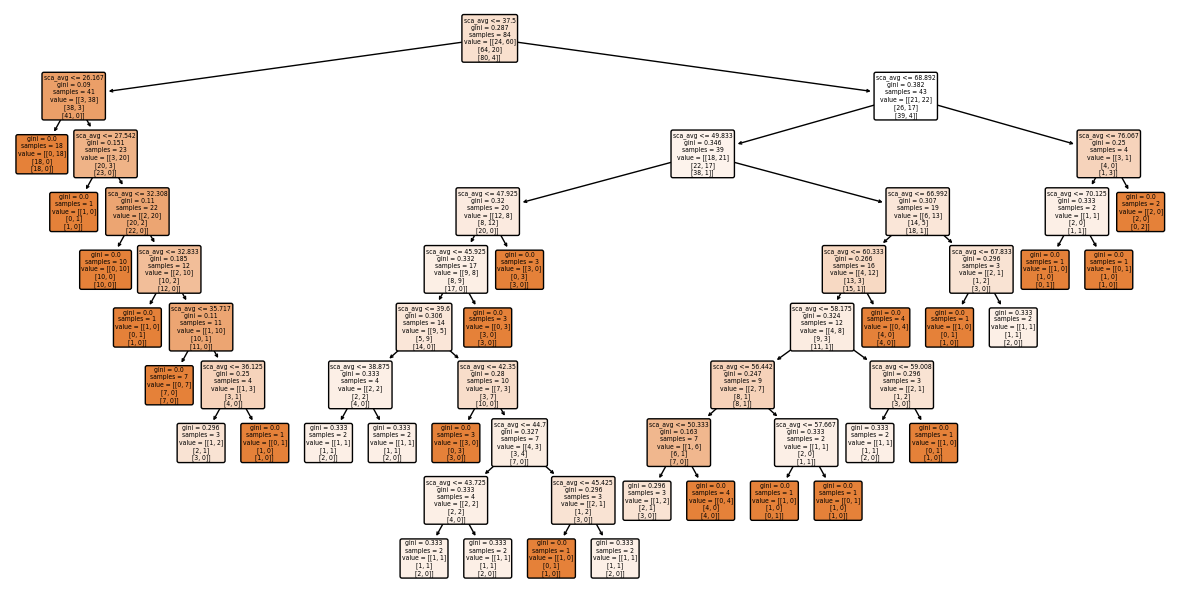

In [18]:
## Plot prelimary tree

plt.figure(figsize=(15, 7.5))
plot_tree(clf_plt_m1, filled = True, rounded = True, class_names=[["0: Did Not Meet", "1: Approaches", "2: Meets", "3: Masters"]], feature_names = X.columns)

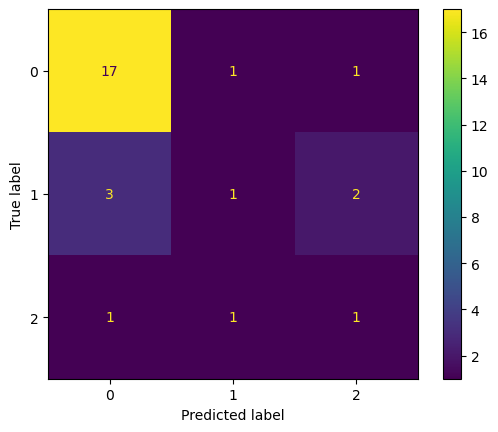

In [19]:
## Confusion matrix
predictions_m1 = clf_dt_m1.predict(X_test)
cm_m1 = confusion_matrix(y_test.values.argmax(axis=1), predictions_m1.argmax(axis=1))
disp_m1 = ConfusionMatrixDisplay(confusion_matrix=cm_m1)
disp_m1.plot()
plt.show()

### [Visualize Alpha m1]

In [20]:
path_m1 = clf_dt_m1.cost_complexity_pruning_path(X_train,y_train) #determine values for alpha
ccp_alphas = path_m1.ccp_alphas #extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha

clf_dts_m1 = []  #create an array that we will use to insert decision trees into

# now create one decison tree per value for alpha and store it in the array

for ccp_alpha in ccp_alphas:
    clf_dt_m1 = DecisionTreeClassifier(random_state = 0, ccp_alpha= ccp_alpha)
    clf_dt_m1.fit(X_train,y_train)
    clf_dts_m1.append(clf_dt_m1)

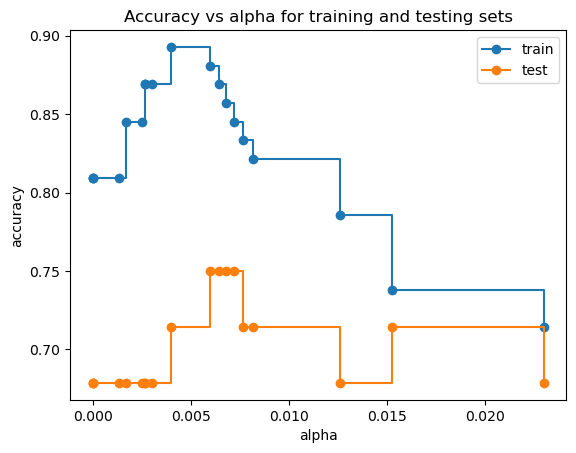

In [21]:
train_scores_m1 = [clf_dt_m1.score(X_train, y_train) for clf_dt_m1 in clf_dts_m1]
test_scores_m1 = [clf_dt_m1.score(X_test , y_test) for clf_dt_m1 in clf_dts_m1]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores_m1, marker = 'o', label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores_m1 , marker = 'o', label = "test", drawstyle = "steps-post")
ax.legend()
plt.show()


### [Cross Validation m1]

<AxesSubplot: xlabel='tree'>

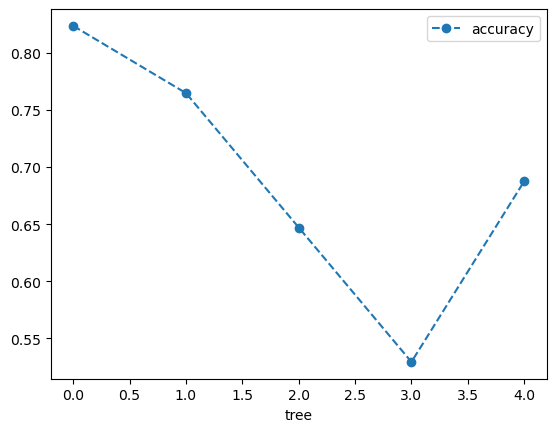

In [22]:
clf_dt_m1 = DecisionTreeClassifier(random_state=123,ccp_alpha=0.007) #create tree with ccp_alpha = 0.07

# We now use 5-fold cross validation to create 5 different training and testig datasets that are used to train and test the tree. We use 5-fold since we don't have a lot of data.
scores_m1 = cross_val_score(clf_dt_m1, X_train, y_train, cv = 5)
df01 = pd.DataFrame(data = {'tree': range(5), 'accuracy' : scores_m1})
df01.plot(x='tree', y = 'accuracy', marker = 'o', linestyle= '--')


<AxesSubplot: xlabel='alpha'>

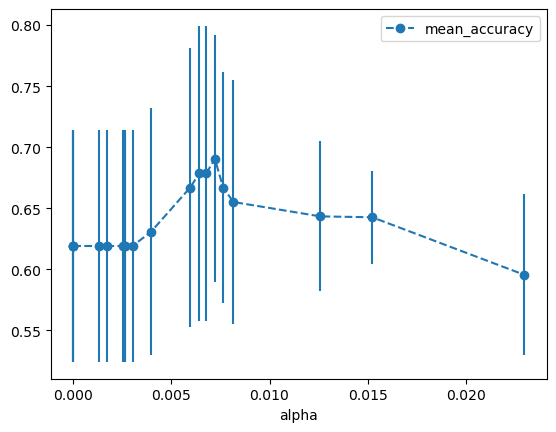

In [23]:
# Create an array to store the results of each fold during cross validation
alpha_loop_values_m1 = []

# For each candidate value for alpha, we will run 5-fold cross validation.
# Then we will store the mean and standard deviation of the scores(accuracy) for each call to cross_val_score in alpha_loop_values

for ccp_alpha in ccp_alphas:
    clf_dt_m1 = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores_m1 = cross_val_score(clf_dt_m1, X_train, y_train, cv = 5)
    alpha_loop_values_m1.append([ccp_alpha, np.mean(scores_m1), np.std(scores_m1)])

# Now we draw a graph of the means and standar deviations of the scores for each candidate value for alpha
alpha_results_m1 = pd.DataFrame(alpha_loop_values_m1, columns=['alpha', 'mean_accuracy', 'std'])

alpha_results_m1.plot (x = 'alpha', y = 'mean_accuracy', yerr = 'std', marker = 'o', linestyle = '--' )




In [24]:
alpha_results_m1[(alpha_results_m1['alpha'] > 0.005) & (alpha_results_m1['alpha'] < 0.009)]

,alpha,mean_accuracy,std
10,0.005952,0.666912,0.114375
11,0.006425,0.678676,0.120633
12,0.006779,0.678676,0.120633
13,0.007215,0.690441,0.101043
14,0.007637,0.666912,0.094496
15,0.008163,0.655147,0.099751


### Model 2: Using 2 classification labels for staar_classification (Fail vs Pass)

In [25]:
# Check values for y
y.unique()

array([0, 1, 2])

In [26]:
# Change values for y from 4 to 2.
y_not_zero_index = y > 0 # get the index for each non-zero value in y
y[y_not_zero_index] = 1  #set each non-zero in y to 1
y.unique() # check new values for y


array([0, 1])

In [27]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=123)
clf_dt_m2 = DecisionTreeClassifier(random_state=123)
clf_dt_m2 = clf_dt_m2.fit(X_train2, y_train2)


[Text(0.3922413793103448, 0.95, 'sca_avg <= 37.5\ngini = 0.408\nsamples = 84\nvalue = [60, 24]\nclass = Fail'),
 Text(0.06896551724137931, 0.85, 'sca_avg <= 26.167\ngini = 0.136\nsamples = 41\nvalue = [38, 3]\nclass = Fail'),
 Text(0.034482758620689655, 0.75, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]\nclass = Fail'),
 Text(0.10344827586206896, 0.75, 'sca_avg <= 27.542\ngini = 0.227\nsamples = 23\nvalue = [20, 3]\nclass = Fail'),
 Text(0.06896551724137931, 0.65, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Pass'),
 Text(0.13793103448275862, 0.65, 'sca_avg <= 32.308\ngini = 0.165\nsamples = 22\nvalue = [20, 2]\nclass = Fail'),
 Text(0.10344827586206896, 0.55, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]\nclass = Fail'),
 Text(0.1724137931034483, 0.55, 'sca_avg <= 32.833\ngini = 0.278\nsamples = 12\nvalue = [10, 2]\nclass = Fail'),
 Text(0.13793103448275862, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Pass'),
 Text(0.20689655172413793, 0.45, 'sca_avg <= 35.717\ngini = 0.16

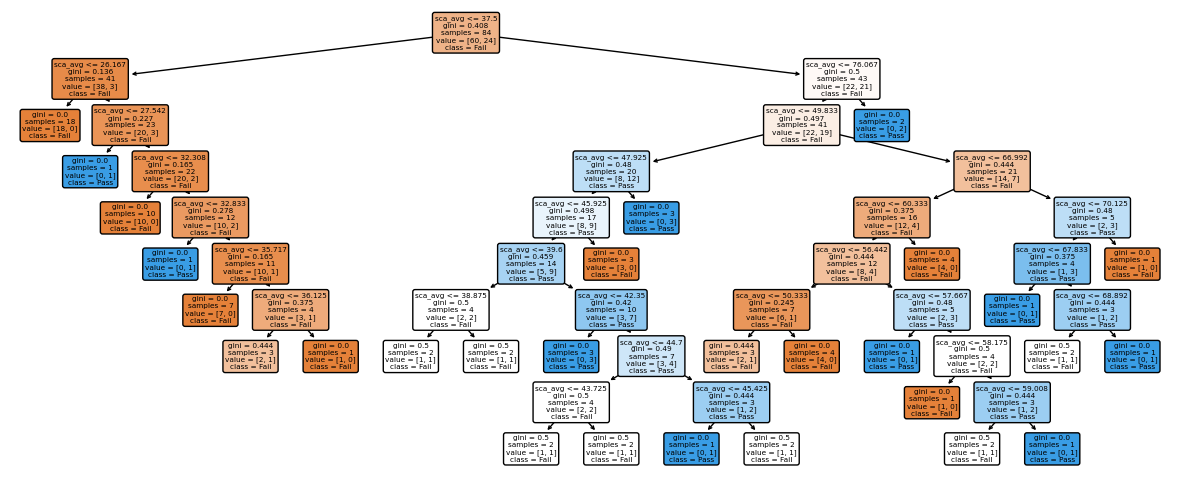

In [28]:
plt.figure(figsize=(15, 6))
plot_tree(clf_dt_m2, filled = True, rounded= True, class_names=["Fail", "Pass"], feature_names=X.columns)

C:\Users\Checo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


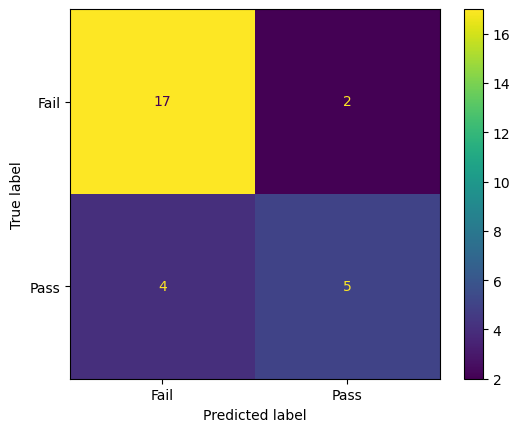

In [29]:
# Plot confusion matrix
cm_m2 = plot_confusion_matrix(clf_dt_m2, X_test2, y_test2, display_labels=["Fail","Pass"])
cm_m2

In [30]:
# Accuracy Score

from sklearn.metrics import accuracy_score

model_prediction = clf_dt_m2.predict(X_test2)
accuracy_score(y_test2, model_prediction)

0.7857142857142857

### vii. Pruning 
### Visualize Alpha m2
Cost complexity pruning can simplify the process for finding a smaller tree that improves accuracy with the Testing Dataset.


In [31]:
path_m2 = clf_dt_m2.cost_complexity_pruning_path(X_train2,y_train2) #determine values for alpha
ccp_alphas = path_m2.ccp_alphas #extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha

clf_dts_m2 = []  #create an array that we will use to insert decision trees into

# now create one decison tree per value for alpha and store it in the array

for ccp_alpha in ccp_alphas:
    clf_dt_m2 = DecisionTreeClassifier(random_state = 0, ccp_alpha= ccp_alpha)
    clf_dt_m2.fit(X_train2,y_train2)
    clf_dts_m2.append(clf_dt_m2)


Now let's graph the accuracy of the trees using the Trainning Dataset and Testing Dataset as a function of alpha.

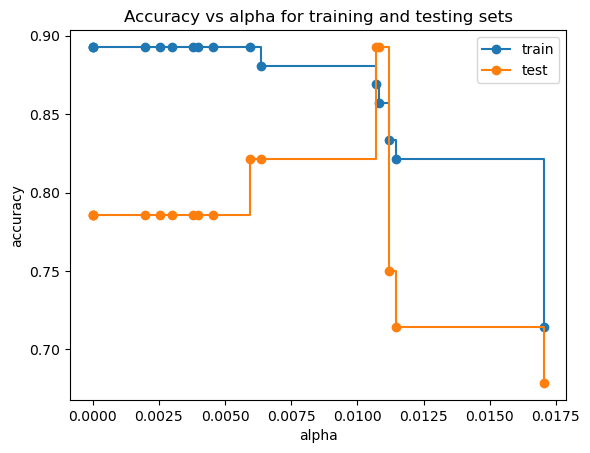

In [32]:
train_scores = [clf_dt_m2.score(X_train2, y_train2) for clf_dt_m2 in clf_dts_m2]
test_scores = [clf_dt_m2.score(X_test2 , y_test2) for clf_dt_m2 in clf_dts_m2]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker = 'o', label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker = 'o', label = "test", drawstyle = "steps-post")
ax.legend()
plt.show()


Alpha value between 0.0100 to 0.0120 is the most accurate. But it is not time to check is alpha changes if we use another training and testing dataset.

### Cross Validation m2

<AxesSubplot: xlabel='tree'>

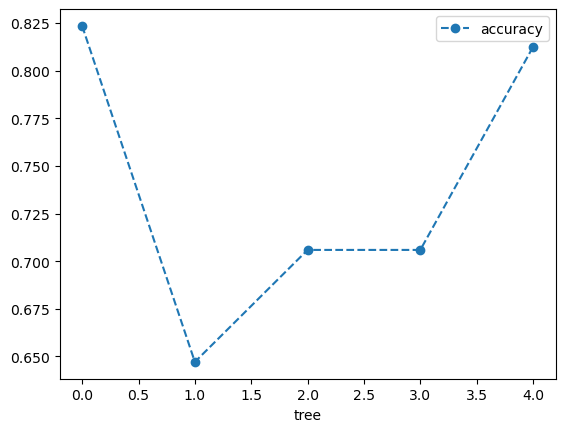

In [33]:
clf_dt_m2 = DecisionTreeClassifier(random_state=123,ccp_alpha=0.0110) #create tree with ccp_alpha =

# We now use 5-fold cross validation to create 5 different training and testig datasets that are used to train and test the tree. We use 5-fold since we don't have a lot of data.
scores = cross_val_score(clf_dt_m2, X_train2, y_train2, cv = 5)
df02 = pd.DataFrame(data = {'tree': range(5), 'accuracy' : scores})
df02.plot(x='tree', y = 'accuracy', marker = 'o', linestyle= '--')


Graph above shows that using different Training and Testing data with same alpha resulted in different accuracies, suggesting that alpha is sensitive to the datasets. Lets use cross validation to find the optimal value for `ccp_alpha`.

<AxesSubplot: xlabel='alpha'>

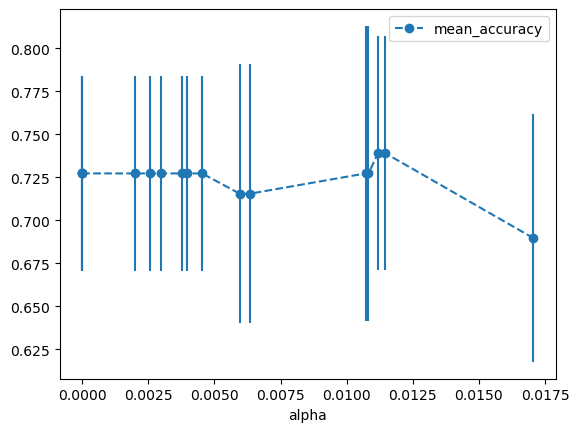

In [34]:
# Create an array to store the results of each fold during cross validation
alpha_loop_values = []

# For each candidate value for alpha, we will run 5-fold cross validation.
# Then we will store the mean and standard deviation of the scores(accuracy) for each call to cross_val_score in alpha_loop_values

for ccp_alpha in ccp_alphas:
    clf_dt_m2 = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt_m2, X_train2, y_train2, cv = 5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

# Now we draw a graph of the means and standar deviations of the scores for each candidate value for alpha
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot (x = 'alpha', y = 'mean_accuracy', yerr = 'std', marker = 'o', linestyle = '--' )





Looks that we need to choose something closer to 0.0110 for the value of alpha

In [35]:
alpha_results[(alpha_results['alpha'] > 0.0100) & (alpha_results['alpha'] < 0.0125)]


,alpha,mean_accuracy,std
11,0.010714,0.727206,0.085762
12,0.010823,0.727206,0.085762
13,0.011187,0.738971,0.068109
14,0.011456,0.738971,0.068109


We found out that the most accurate alpha value is 0.011187. 

In [36]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.011455) & (alpha_results['alpha'] <0.011457)]['alpha']
print(ideal_ccp_alpha)

14    0.011456
Name: alpha, dtype: float64


Convert the value of `ideal_ccp_alpha` from Series to float

In [37]:
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.011456023651145605

### viii Building, Evaluating, Drawing the Final Classification Tree

In [38]:
# Build pruned decision tree with optimal alpha value
clf_dt_m2_pruned = DecisionTreeClassifier(random_state=123, ccp_alpha = ideal_ccp_alpha)
clf_dt_m2_pruned = clf_dt_m2_pruned.fit(X_train2, y_train2)

C:\Users\Checo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


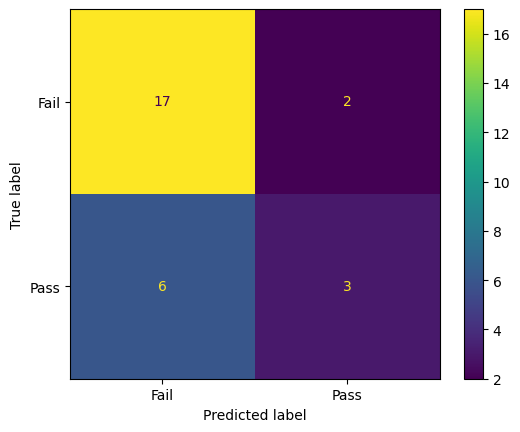

In [39]:
# Plot the confusion matrix for pruned tree
plot_confusion_matrix(clf_dt_m2_pruned, X_test2, y_test2, display_labels= ["Fail", "Pass"])


In [40]:
# Accuracy score

model_prediction2 = clf_dt_m2_pruned.predict(X_test2)
accuracy_score(y_test2, model_prediction2)

0.7142857142857143

[Text(0.5714285714285714, 0.9166666666666666, 'sca_avg <= 37.5\ngini = 0.408\nsamples = 84\nvalue = [60, 24]\nclass = Fail'),
 Text(0.42857142857142855, 0.75, 'gini = 0.136\nsamples = 41\nvalue = [38, 3]\nclass = Fail'),
 Text(0.7142857142857143, 0.75, 'sca_avg <= 76.067\ngini = 0.5\nsamples = 43\nvalue = [22, 21]\nclass = Fail'),
 Text(0.5714285714285714, 0.5833333333333334, 'sca_avg <= 49.833\ngini = 0.497\nsamples = 41\nvalue = [22, 19]\nclass = Fail'),
 Text(0.42857142857142855, 0.4166666666666667, 'sca_avg <= 47.925\ngini = 0.48\nsamples = 20\nvalue = [8, 12]\nclass = Pass'),
 Text(0.2857142857142857, 0.25, 'sca_avg <= 45.925\ngini = 0.498\nsamples = 17\nvalue = [8, 9]\nclass = Pass'),
 Text(0.14285714285714285, 0.08333333333333333, 'gini = 0.459\nsamples = 14\nvalue = [5, 9]\nclass = Pass'),
 Text(0.42857142857142855, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Fail'),
 Text(0.5714285714285714, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Pas

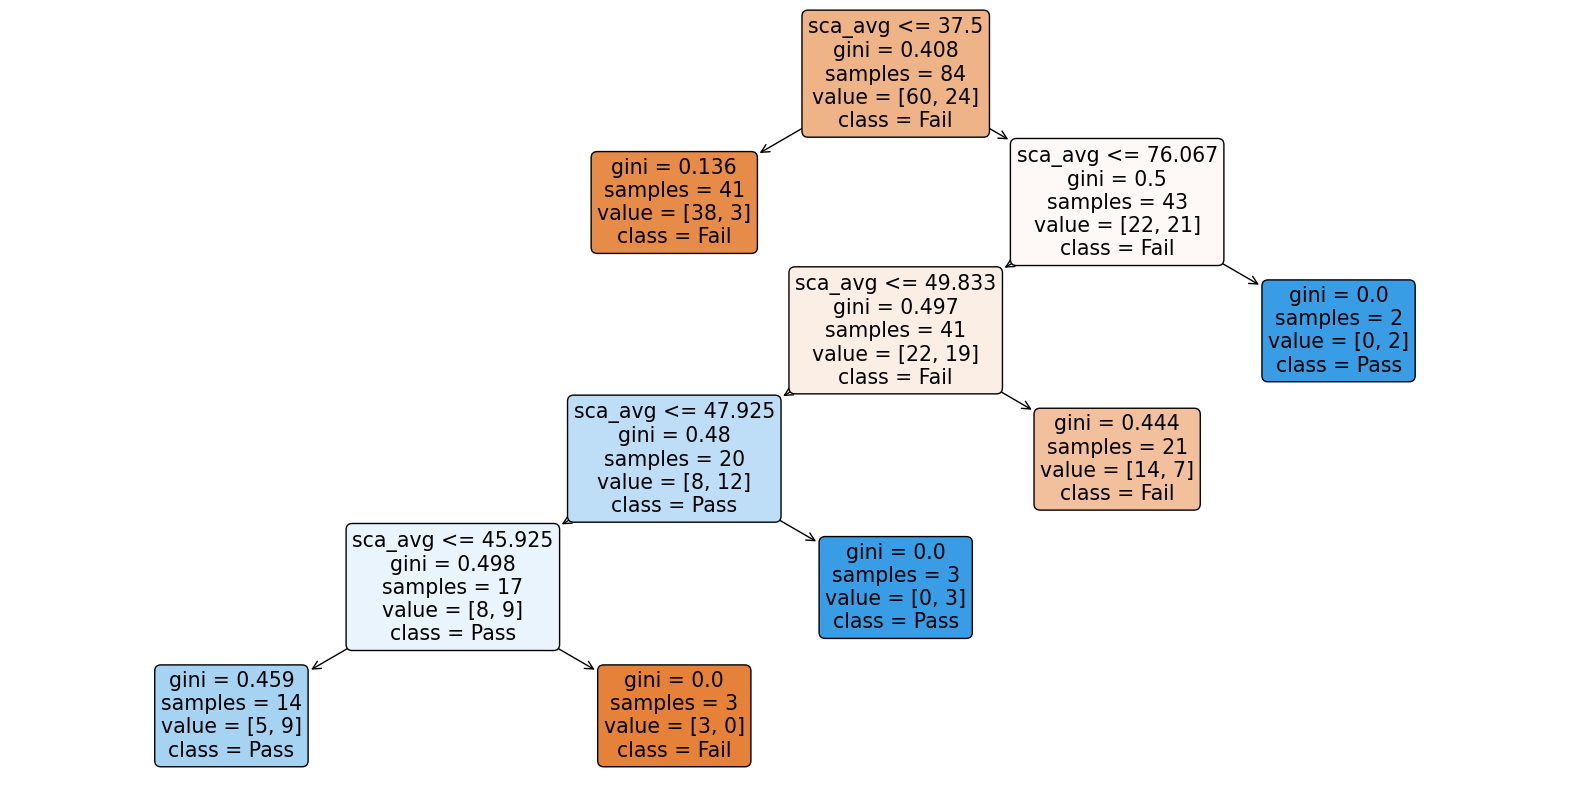

In [41]:
plt.figure(figsize = (20,10))
plot_tree(clf_dt_m2_pruned, filled = True, rounded = True, class_names = ["Fail", "Pass"], feature_names = X.columns)

### ix. Test 2022-2023 Data

In [44]:
# Import data 2022-2021
df_22_23 = pd.read_csv(nb_path + "/data/dummy_8th_22-23.csv") 

# Add an average columns for sca's and rename df to df01 which includes less columns

df_22_23 = df_22_23.assign(sca_avg = df_22_23[["sca_1","sca_2","sca_3"]].mean(axis=1) )
df_22_23 = df_22_23[["student_id", "first_name", "last_name", "sca_1","sca_2","sca_3","staar_curr", "staar_curr_clas","sca_avg"]]

In [45]:
# Replace nan values from staar_classification as 'Nan'
df_22_23.sca_avg = df_22_23.sca_avg.fillna('NaN')
df_22_23 = df_22_23[(df_22_23["sca_avg"] != 'NaN')]
df_22_23 = df_22_23.loc[(df_22_23["sca_avg"] != 'NaN')]
df_22_23["sca_avg"] = df_22_23.sca_avg.astype(float)

In [46]:
# Prepare X_predict

X_predict = df_22_23[["sca_avg"]].copy()
X_predict.dtypes


sca_avg    float64
dtype: object

In [47]:
# Predict using model

clf_dt_m2_pruned_22_23 = clf_dt_m2_pruned.predict(X_predict)

In [48]:
predictor = clf_dt_m2_pruned_22_23
predictor

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [49]:
# Index location of stundents who will pass.
index = np.where(predictor == 1)[0]     
print(index)
        

[ 4  9 12 14 19 20 22 37 38]


In [50]:
# Get the information of students who will pass from df_22_23 (pandas dataframe)
passingStudents = df_22_23.iloc[index]
passingStudents

,student_id,first_name,last_name,sca_1,sca_2,sca_3,staar_curr,staar_curr_clas,sca_avg
4,204,Francis Norman,Marilyn Knapp,100.0,94.0,88.0,NaN,NaN,94.000000
9,209,Erma Banks,Inaaya Price,83.0,89.0,92.0,NaN,NaN,88.000000
12,212,Valerie King,Zohaib Gibson,42.0,22.0,56.0,NaN,NaN,40.000000
14,214,Earnest Terry,Milan Barton,75.0,22.0,NaN,NaN,NaN,48.500000
19,219,Otis Craig,Loui Clay,50.0,39.0,44.0,NaN,NaN,44.333333
20,220,Norman Casey,Hugh Cox,92.0,83.0,96.0,NaN,NaN,90.333333
22,222,Mindy Miles,Gabrielle Rivas,NaN,44.0,32.0,NaN,NaN,38.000000
37,237,Margie Carr,Philippa Galvan,75.0,83.0,80.0,NaN,NaN,79.333333
38,238,Courtney Palmer,Bertha Navarro,83.0,78.0,76.0,NaN,NaN,79.000000
